## The Data Story

<b> The question i am mtrying to answer here is that whether we can differentiate the group of people who default
and the group of people who don't default with respect to some of the important variables that are part of the
data set. </b>

In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [79]:
## The column set out of which i am going to pick some interesting variables for analysis and visualization 
overtopcols = ['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'INS_AMT_SUM',
 'INS_DAYS_OVERDUE_MEAN',
 'AMT_CREDIT_y',
 'AMT_ANNUITY',
 'DAYS_EMPLOYED',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_CREDIT_x',
 'POS_CREDIT_TERM_MEAN',
 'BRU_MEAN_AMT_CREDIT_SUM',
 'HOUR_APPR_PROCESS_START_y',
 'INS_DAYS_OVERDUE_MAX',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'AMT_GOODS_PRICE',
 'INS_NUM_MAX',
 'BRU_MAX_CRDT_SUM_DEBT',
 'HOUR_APPR_PROCESS_START_x',
 'BRU_MEAN_CLOSED_COUNT',
 'BRU_MEAN_ACTIVE_COUNT',
 'WEEKDAY_APPR_PROCESS_START_x',
 'BRU_AMT_MAX_OVERDUE',
 'WEEKDAY_APPR_PROCESS_START_y',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'PREV_CLT_REP_COUNT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [4]:
dfinal = pd.read_csv('dfinal.csv')

In [5]:
overeda = dfinal[overtopcols]

In [6]:
# Renaming the "TARGET" Column as "DEFAULT"
overeda['default'] = dfinal['TARGET']

In [7]:
overeda.head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,INS_AMT_SUM,INS_DAYS_OVERDUE_MEAN,AMT_CREDIT_y,AMT_ANNUITY,DAYS_EMPLOYED,...,HOUR_APPR_PROCESS_START_x,BRU_MEAN_CLOSED_COUNT,BRU_MEAN_ACTIVE_COUNT,WEEKDAY_APPR_PROCESS_START_x,BRU_AMT_MAX_OVERDUE,WEEKDAY_APPR_PROCESS_START_y,OBS_30_CNT_SOCIAL_CIRCLE,PREV_CLT_REP_COUNT,AMT_REQ_CREDIT_BUREAU_YEAR,default
0,0.262949,0.139376,-9461,-2120,-3648.0,219625.695,20.421053,179055.00,24700.5,-637,...,10,6.0,2.0,WEDNESDAY,5043.645,6.0,2.0,0.0,1.0,1
1,0.622246,NaN,-16765,-291,-1186.0,1618864.650,7.160000,484191.00,35698.5,-1188,...,11,3.0,1.0,MONDAY,0.000,4.0,1.0,1.0,0.0,0
2,0.555912,0.729567,-19046,-2531,-4260.0,21288.465,7.666667,20106.00,6750.0,-225,...,9,2.0,0.0,MONDAY,0.000,5.0,0.0,0.0,0.0,0
3,0.650442,NaN,-19005,-2437,-9833.0,1007153.415,19.375000,291695.50,29686.5,-3039,...,17,NaN,NaN,WEDNESDAY,NaN,4.0,2.0,8.0,NaN,0
4,0.322738,NaN,-19932,-3458,-4311.0,835985.340,3.636364,166638.75,21865.5,-3038,...,11,1.0,0.0,THURSDAY,0.000,3.0,0.0,5.0,0.0,0


In [8]:
overeda.columns

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'INS_AMT_SUM', 'INS_DAYS_OVERDUE_MEAN',
       'AMT_CREDIT_y', 'AMT_ANNUITY', 'DAYS_EMPLOYED',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT_x', 'POS_CREDIT_TERM_MEAN',
       'BRU_MEAN_AMT_CREDIT_SUM', 'HOUR_APPR_PROCESS_START_y',
       'INS_DAYS_OVERDUE_MAX', 'AMT_INCOME_TOTAL',
       'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE', 'INS_NUM_MAX',
       'BRU_MAX_CRDT_SUM_DEBT', 'HOUR_APPR_PROCESS_START_x',
       'BRU_MEAN_CLOSED_COUNT', 'BRU_MEAN_ACTIVE_COUNT',
       'WEEKDAY_APPR_PROCESS_START_x', 'BRU_AMT_MAX_OVERDUE',
       'WEEKDAY_APPR_PROCESS_START_y', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'PREV_CLT_REP_COUNT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'default'],
      dtype='object')

In [9]:
# Dropping the columns with suffix y
overeda.drop(columns = ['AMT_CREDIT_y','HOUR_APPR_PROCESS_START_y','WEEKDAY_APPR_PROCESS_START_y'], inplace = True)

In [10]:
overeda.columns

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'INS_AMT_SUM', 'INS_DAYS_OVERDUE_MEAN',
       'AMT_ANNUITY', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_CREDIT_x', 'POS_CREDIT_TERM_MEAN', 'BRU_MEAN_AMT_CREDIT_SUM',
       'INS_DAYS_OVERDUE_MAX', 'AMT_INCOME_TOTAL',
       'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE', 'INS_NUM_MAX',
       'BRU_MAX_CRDT_SUM_DEBT', 'HOUR_APPR_PROCESS_START_x',
       'BRU_MEAN_CLOSED_COUNT', 'BRU_MEAN_ACTIVE_COUNT',
       'WEEKDAY_APPR_PROCESS_START_x', 'BRU_AMT_MAX_OVERDUE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'PREV_CLT_REP_COUNT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'default'],
      dtype='object')

In [11]:
# Renaming some of the columns to remove the suffix x
overeda.columns = [y[0:len(y)-2] if (y[len(y)- 2] == '_') & (y[len(y)- 1] == 'x') else y for y in overeda.columns]

In [24]:
overeda.columns

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'INS_AMT_SUM', 'INS_DAYS_OVERDUE_MEAN',
       'AMT_ANNUITY', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT',
       'POS_CREDIT_TERM_MEAN', 'BRU_MEAN_AMT_CREDIT_SUM',
       'INS_DAYS_OVERDUE_MAX', 'AMT_INCOME_TOTAL',
       'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE', 'INS_NUM_MAX',
       'BRU_MAX_CRDT_SUM_DEBT', 'HOUR_APPR_PROCESS_START',
       'BRU_MEAN_CLOSED_COUNT', 'BRU_MEAN_ACTIVE_COUNT',
       'WEEKDAY_APPR_PROCESS_START', 'BRU_AMT_MAX_OVERDUE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'PREV_CLT_REP_COUNT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'default'],
      dtype='object')

In [13]:
pd.options.display.max_columns = None

In [14]:
overeda.head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,INS_AMT_SUM,INS_DAYS_OVERDUE_MEAN,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,POS_CREDIT_TERM_MEAN,BRU_MEAN_AMT_CREDIT_SUM,INS_DAYS_OVERDUE_MAX,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,INS_NUM_MAX,BRU_MAX_CRDT_SUM_DEBT,HOUR_APPR_PROCESS_START,BRU_MEAN_CLOSED_COUNT,BRU_MEAN_ACTIVE_COUNT,WEEKDAY_APPR_PROCESS_START,BRU_AMT_MAX_OVERDUE,OBS_30_CNT_SOCIAL_CIRCLE,PREV_CLT_REP_COUNT,AMT_REQ_CREDIT_BUREAU_YEAR,default
0,0.262949,0.139376,-9461,-2120,-3648.0,219625.695,20.421053,24700.5,-637,-1134.0,406597.5,24.000000,108131.945625,31.0,202500.0,0.018801,351000.0,19.0,245781.0,10,6.0,2.0,WEDNESDAY,5043.645,2.0,0.0,1.0,1
1,0.622246,NaN,-16765,-291,-1186.0,1618864.650,7.160000,35698.5,-1188,-828.0,1293502.5,10.107143,254350.125000,14.0,270000.0,0.003541,1129500.0,12.0,0.0,11,3.0,1.0,MONDAY,0.000,1.0,1.0,0.0,0
2,0.555912,0.729567,-19046,-2531,-4260.0,21288.465,7.666667,6750.0,-225,-815.0,135000.0,3.750000,94518.900000,11.0,67500.0,0.010032,135000.0,3.0,0.0,9,2.0,0.0,MONDAY,0.000,0.0,0.0,0.0,0
3,0.650442,NaN,-19005,-2437,-9833.0,1007153.415,19.375000,29686.5,-3039,-617.0,312682.5,12.000000,NaN,77.0,135000.0,0.008019,297000.0,10.0,NaN,17,NaN,NaN,WEDNESDAY,NaN,2.0,8.0,NaN,0
4,0.322738,NaN,-19932,-3458,-4311.0,835985.340,3.636364,21865.5,-3038,-1106.0,513000.0,15.333333,146250.000000,31.0,121500.0,0.028663,513000.0,17.0,0.0,11,1.0,0.0,THURSDAY,0.000,0.0,5.0,0.0,0


In [81]:
 ## Changing negative values to absolute values to make more sense out of it in the visualization and hypothesis testing
overeda['DAYS_ID_PUBLISH'] = abs(overeda['DAYS_ID_PUBLISH'])
overeda['DAYS_BIRTH'] = abs(overeda['DAYS_BIRTH'])
overeda['DAYS_REGISTRATION'] = abs(overeda['DAYS_REGISTRATION'])
overeda['DAYS_LAST_PHONE_CHANGE'] = abs(overeda['DAYS_LAST_PHONE_CHANGE'])
overeda['DAYS_EMPLOYED'] = abs(overeda['DAYS_EMPLOYED'])
overeda.head()

,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,INS_AMT_SUM,INS_DAYS_OVERDUE_MEAN,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,POS_CREDIT_TERM_MEAN,BRU_MEAN_AMT_CREDIT_SUM,INS_DAYS_OVERDUE_MAX,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,INS_NUM_MAX,BRU_MAX_CRDT_SUM_DEBT,HOUR_APPR_PROCESS_START,BRU_MEAN_CLOSED_COUNT,BRU_MEAN_ACTIVE_COUNT,WEEKDAY_APPR_PROCESS_START,BRU_AMT_MAX_OVERDUE,OBS_30_CNT_SOCIAL_CIRCLE,PREV_CLT_REP_COUNT,AMT_REQ_CREDIT_BUREAU_YEAR,default
0,0.262949,0.139376,9461,2120,3648.0,219625.695,20.421053,24700.5,637,1134.0,406597.5,24.000000,108131.945625,31.0,202500.0,0.018801,351000.0,19.0,245781.0,10,6.0,2.0,WEDNESDAY,5043.645,2.0,0.0,1.0,1
1,0.622246,NaN,16765,291,1186.0,1618864.650,7.160000,35698.5,1188,828.0,1293502.5,10.107143,254350.125000,14.0,270000.0,0.003541,1129500.0,12.0,0.0,11,3.0,1.0,MONDAY,0.000,1.0,1.0,0.0,0
2,0.555912,0.729567,19046,2531,4260.0,21288.465,7.666667,6750.0,225,815.0,135000.0,3.750000,94518.900000,11.0,67500.0,0.010032,135000.0,3.0,0.0,9,2.0,0.0,MONDAY,0.000,0.0,0.0,0.0,0
3,0.650442,NaN,19005,2437,9833.0,1007153.415,19.375000,29686.5,3039,617.0,312682.5,12.000000,NaN,77.0,135000.0,0.008019,297000.0,10.0,NaN,17,NaN,NaN,WEDNESDAY,NaN,2.0,8.0,NaN,0
4,0.322738,NaN,19932,3458,4311.0,835985.340,3.636364,21865.5,3038,1106.0,513000.0,15.333333,146250.000000,31.0,121500.0,0.028663,513000.0,17.0,0.0,11,1.0,0.0,THURSDAY,0.000,0.0,5.0,0.0,0


In [16]:
overeda.columns

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'INS_AMT_SUM', 'INS_DAYS_OVERDUE_MEAN',
       'AMT_ANNUITY', 'DAYS_EMPLOYED', 'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT',
       'POS_CREDIT_TERM_MEAN', 'BRU_MEAN_AMT_CREDIT_SUM',
       'INS_DAYS_OVERDUE_MAX', 'AMT_INCOME_TOTAL',
       'REGION_POPULATION_RELATIVE', 'AMT_GOODS_PRICE', 'INS_NUM_MAX',
       'BRU_MAX_CRDT_SUM_DEBT', 'HOUR_APPR_PROCESS_START',
       'BRU_MEAN_CLOSED_COUNT', 'BRU_MEAN_ACTIVE_COUNT',
       'WEEKDAY_APPR_PROCESS_START', 'BRU_AMT_MAX_OVERDUE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'PREV_CLT_REP_COUNT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'default'],
      dtype='object')

In [17]:
# Calculating the mean value for each column for default and non-default groups
ovmean = overeda.groupby('default', as_index = False).mean()

In [18]:
# Calculating the median value for each column for default and non-default groups
ovmed = overeda.groupby('default', as_index = False).median()

In [19]:
ovmean.head()

,default,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,INS_AMT_SUM,INS_DAYS_OVERDUE_MEAN,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,POS_CREDIT_TERM_MEAN,BRU_MEAN_AMT_CREDIT_SUM,INS_DAYS_OVERDUE_MAX,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,INS_NUM_MAX,BRU_MAX_CRDT_SUM_DEBT,HOUR_APPR_PROCESS_START,BRU_MEAN_CLOSED_COUNT,BRU_MEAN_ACTIVE_COUNT,BRU_AMT_MAX_OVERDUE,OBS_30_CNT_SOCIAL_CIRCLE,PREV_CLT_REP_COUNT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0.523479,0.520969,16138.176397,3017.219788,5029.941065,677949.983775,11.297230,27163.623349,69668.812255,976.388294,602648.282002,14.483313,383229.162980,37.879407,169077.722266,0.021021,542736.795003,24.123348,507719.009438,12.086807,3.513135,2.021952,6359.375132,1.415742,3.544946,1.889199
1,1,0.410935,0.390717,14884.828077,2732.099617,4487.127009,614110.610489,10.272889,26481.744290,45587.324149,808.796818,557778.527674,14.940229,316600.958111,37.113399,165611.760906,0.019131,488972.412554,24.876284,499155.682675,11.797100,3.122987,2.471328,8922.033307,1.496147,3.792409,2.028783


In [20]:
ovmed.head()

,default,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_ID_PUBLISH,DAYS_REGISTRATION,INS_AMT_SUM,INS_DAYS_OVERDUE_MEAN,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,POS_CREDIT_TERM_MEAN,BRU_MEAN_AMT_CREDIT_SUM,INS_DAYS_OVERDUE_MAX,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,AMT_GOODS_PRICE,INS_NUM_MAX,BRU_MAX_CRDT_SUM_DEBT,HOUR_APPR_PROCESS_START,BRU_MEAN_CLOSED_COUNT,BRU_MEAN_ACTIVE_COUNT,BRU_AMT_MAX_OVERDUE,OBS_30_CNT_SOCIAL_CIRCLE,PREV_CLT_REP_COUNT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0.573905,0.546023,15877,3295,4544.0,333943.335,9.627907,24876.0,2304,776.0,517788.0,12.0,196213.000000,31.0,148500.0,0.018850,450000.0,12.0,133774.245,12,3.0,2.0,0.0,0.0,2.0,1.0
1,1,0.440381,0.379100,14282,2797,4056.0,271642.050,8.629630,25263.0,1458,594.0,497520.0,12.0,187143.499688,31.0,135000.0,0.018634,450000.0,12.0,193443.750,12,2.0,2.0,0.0,0.0,2.0,2.0


In [21]:
# Creating a function to visualize a certain variable with respect to the default and non-default groups
def credreport(col,ylabel,numbin = 0,ylt = 0,binflag = 0, ylimflag = 0):
    
    plt.subplots(nrows = 1,ncols = 3,figsize = (25,10))
    plt.subplot(1,3,1)
    sns.barplot(ovmean['default'], ovmean[col])
    #plt.bar(dfmean['default'], dfmean['DAYS_ID_PUBLISH'])
    plt.title('mean comparison of defaults vs non-defaults')
    plt.xlabel('default status')
    plt.ylabel(ylabel)
    plt.xticks(ovmean['default'],('non-default','default'))

    plt.subplot(1,3,2)
    sns.barplot(ovmed['default'], ovmed[col])
    #plt.title('mean comparison of defaults vs non-defaults')
    plt.xlabel('default status')
    plt.ylabel(ylabel)
    #plt.xticks(dfmean['default'],('non-default','default')
    plt.title('median comparison of defaults vs non-defaults')
    #plt.ylabel('normalized ext source 2 score')
    plt.xticks(ovmed['default'],('non-default','default'))


    plt.subplot(1,3,3)

    ax = sns.boxplot(y = col, x = 'default', data = overeda, showfliers = True)
    #dfeda[dfeda['default'] == 0].boxplot(column = ['AMT_INCOME_TOTAL'])
    if ylimflag == 1:
        ax.set(ylim =(0,ylt))
    plt.xlabel('default status')
    plt.ylabel(ylabel)
    if binflag == 1:
        plt.locator_params(axis ='y', nbins= numbin)
    
    plt.xticks(ovmean['default'],('non-default','default'))
    #plt.locator_params(axis='x', nbins=10)

    plt.subplots_adjust(wspace = 0.4)
    plt.show()

In [78]:
len(columnsofinterest)

14

Let us first visualize the <b> total income amount (AMT_INCOME_TOTAL) </b>  and see whether it varies among the default and the non default group.

In [25]:
inc_def = overeda[overeda['default'] == 1]['AMT_INCOME_TOTAL']
inc_nondef = overeda[overeda['default'] == 0]['AMT_INCOME_TOTAL']

In [35]:
print('The mean value of total income for the default group is {:0.3f}'.format(inc_def.mean()))
print('The mean value of total income for the non-default group is {:0.3f}'.format(inc_nondef.mean()))

The mean value of total income for the default group is 165611.761
The mean value of total income for the non-default group is 169077.722


In [32]:
print(inc_nondef.mean())

169077.7222658179


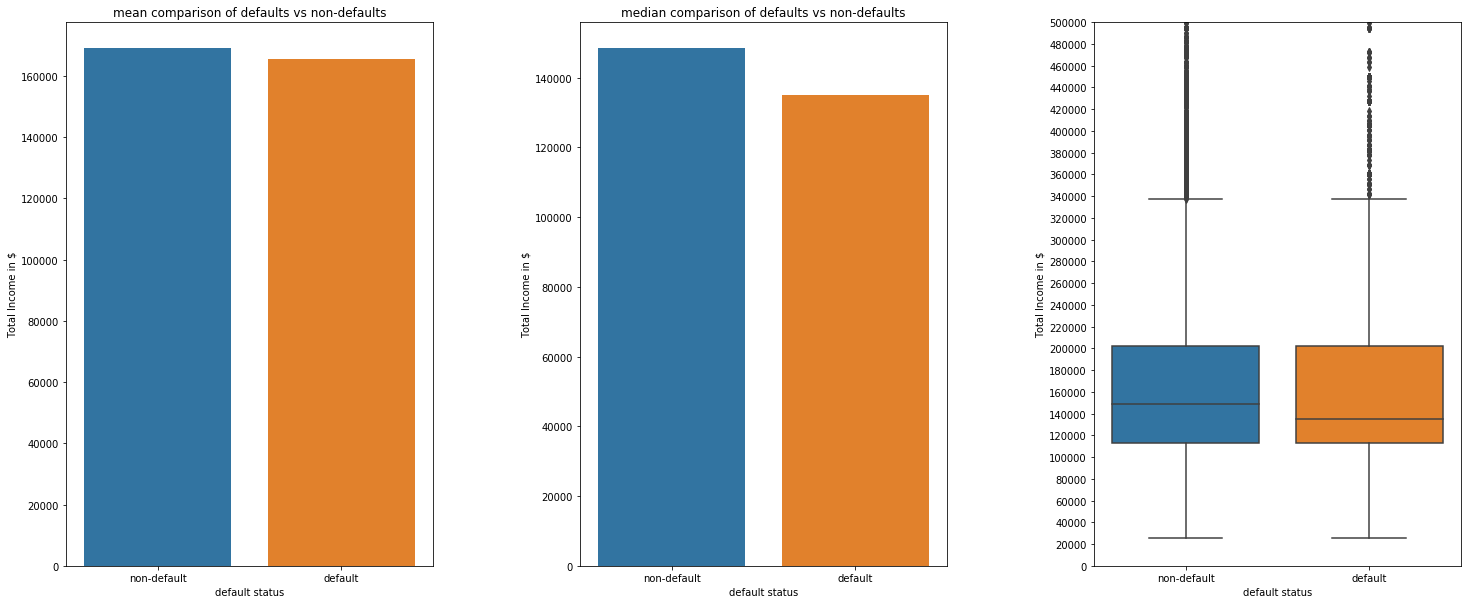

In [22]:
credreport('AMT_INCOME_TOTAL','Total Income in $',numbin = 35,ylt = 500000,binflag = 1, ylimflag = 1)

The mean total income amount for the non-default group is 169077.722 whereas the total income amount for the
default group is 165611.76. We can also visualize this difference in the bargraphs. In conclusion, the difference
doesn't appear to be substantial and consequently, total income amount somewhat surprisingly doesn't appear to be a good indicator to differentiate the defaul and non-default groups.

I am curious to see whether <b> age of an applicant (DAYS_BIRTH) </b>
has any bearing on his/her probability of defaulting.
Let get going and visualize the DAYS_BIRTH variable.

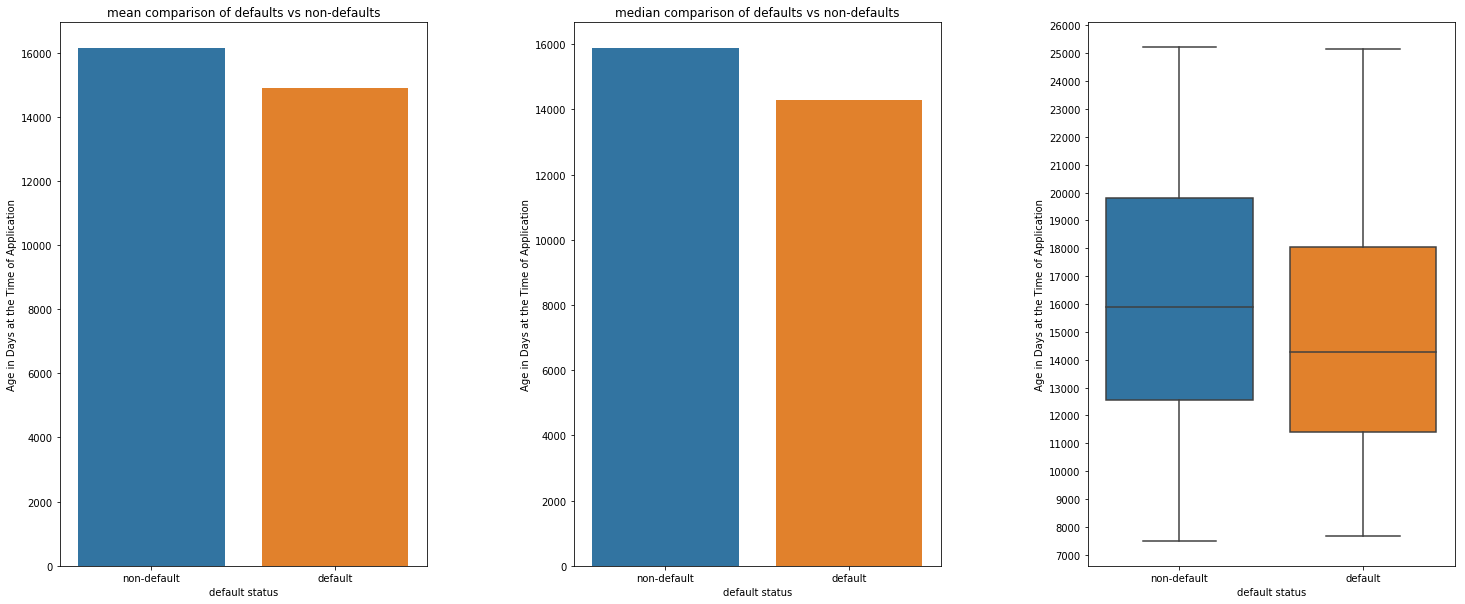

In [83]:
credreport('DAYS_BIRTH','Age in Days at the Time of Application',numbin = 35, binflag = 1)

In [84]:
dob_def = overeda[overeda['default'] == 1]['DAYS_BIRTH']
dob_nondef = overeda[overeda['default'] == 0]['DAYS_BIRTH']

In [85]:
print('The mean value of age for the default group is {:0.3f}'.format(dob_def.mean()))
print('The mean value of age for the non-default group is {:0.3f}'.format(dob_nondef.mean()))

The mean value of age for the default group is 14884.828
The mean value of age for the non-default group is 16138.176


In [86]:
dob_def.describe()

count    24825.000000
mean     14884.828077
std       4192.844583
min       7678.000000
25%      11396.000000
50%      14282.000000
75%      18037.000000
max      25168.000000
Name: DAYS_BIRTH, dtype: float64

In [87]:
dob_nondef.describe()

count    282686.000000
mean      16138.176397
std        4364.200856
min        7489.000000
25%       12536.000000
50%       15877.000000
75%       19793.750000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

The mean age of the non-default group is 16138 days days (around 44 years) whereas the mean age of the
default group is 14884 days (around 40 years). This means that on average the people who don't default are elder by 1254 days (around 3.5 years) than the people who defult. 

There is also substantial diffrence in age of the two groups in their 50th (median) and 75th percentiles respectively.
The 75th percentile of the non-default group is 19793 days ( around 54 years) whereas for the default group it is 18037 days (around 49 years) . Similarly, the
median of the non-default group is 15877 days (around 43 years) whereas for the default group it is 14282 days (around 39 years) . The difference in 50th and 75th percentile between the two groups can be cleary visualized in the above box plot.


In summary, all these findings indictae that there is a substantial diffrence in age between the
default and non-default groups wherein on average the people who default are younger than the people who don't default. 

Thus the age appears to be a good indicator to diffentiate a defualt from non-default.

Let's now also visualize the <b> Employmet Duration (DAYS_EMPLOYED) </b> to understand it's effectiveness in differentiating the default and non-default groups.

In [44]:
emp_def = overeda[overeda['default'] == 1]['DAYS_EMPLOYED']
emp_nondef = overeda[overeda['default'] == 0]['DAYS_EMPLOYED']

In [55]:
print('The mean value of employment duration for the default group is {:0.3f}'.format(emp_def.mean()))
print('The mean value of employment duration for the non-default group is {:0.3f}'.format(emp_nondef.mean()))

The mean value of employment duration for the default group is 45587.324
The mean value of employment duration for the non-default group is 69668.812


In [49]:
emp_def.describe()

count     24825.000000
mean      45587.324149
std      118303.300421
min           0.000000
25%         677.000000
50%        1458.000000
75%        3280.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [50]:
emp_nondef.describe()

count    282686.000000
mean      69668.812255
std      140983.356991
min           0.000000
25%         967.000000
50%        2304.000000
75%        6074.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
The mean employment duration for the non-default group is 69668 days whereas the employment duration for the
default group is 45587. 

There is also substantial diffrence in employment duration of the two groups in their 50th (median) and 75th percentiles respectively.
The 75th percentile of the non-default group is 6074 days whereas for the default group it is 3280 days. Similarly, the
median of the non-default group is 2304 days whereas for the default group it is 1458 days. The difference in 50th and 75th percentile between the two groups can be cleary visualized in the above box plot.


In summary, all these findings indictae that there is a substantial diffrence in employment duration between the
default and non-default groups and thus the employment duration appears to be a good indicator to diffentiate
a defualt from non-default.

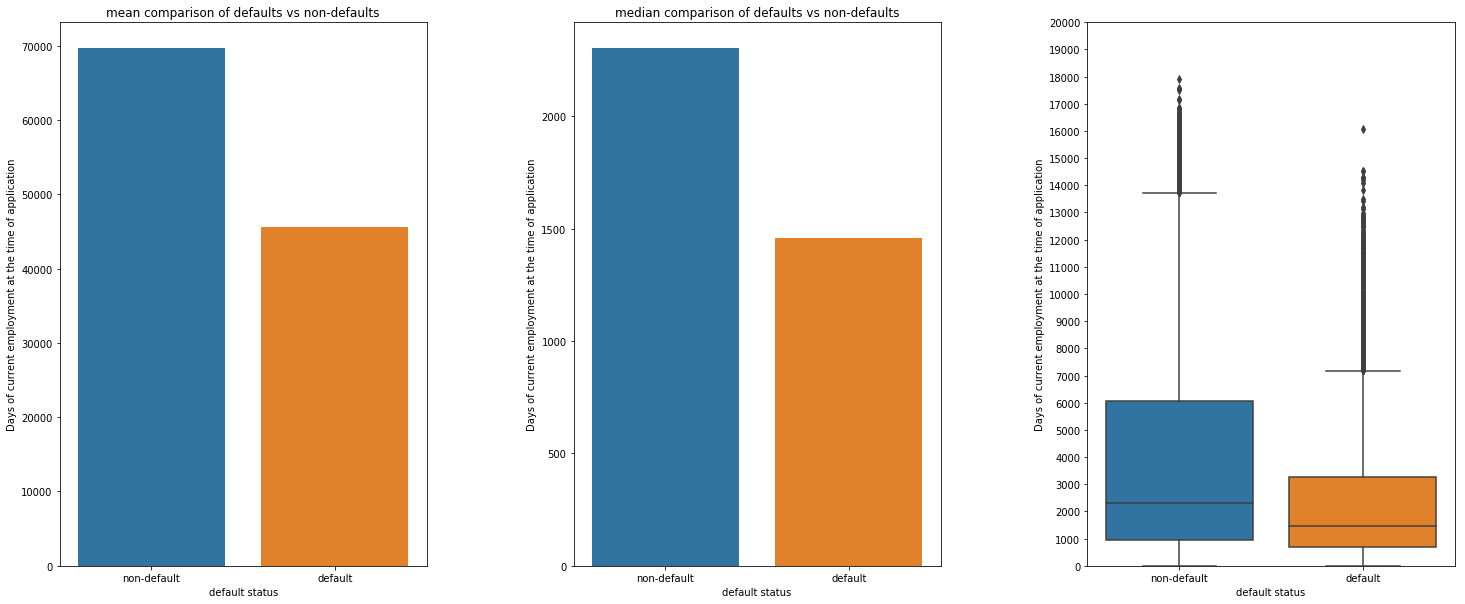

In [59]:
credreport('DAYS_EMPLOYED','Days of current employment at the time of application',numbin =35,ylt = 20000, 
binflag = 1, ylimflag = 1)

The mean employment duration for the non-default group is 69668 days whereas the employment duration for the
default group is 45587. 

There is also substantial diffrence in employment duration of the two groups in their 50th (median) and 75th percentiles respectively.
The 75th percentile of the non-default group is 6074 days whereas for the default group it is 3280 days. Similarly, the
median of the non-default group is 2304 days whereas for the default group it is 1458 days. The difference in 50th and 75th percentile between the two groups can be cleary visualized in the above box plot.


In summary, all these findings indictae that there is a substantial diffrence in employment duration between the
default and non-default groups and thus the employment duration appears to be a good indicator to diffentiate
a defualt from non-default.



I am also interested about the variable <b> DAYS_LAST_PHONE_CHANGE </b> which tells us how many days before the application
the applicant changed his phone number. Whether this variable has any signifinace on a person defaulting on the loan?
Let's visualize this variable with respect to the default and non-default group.

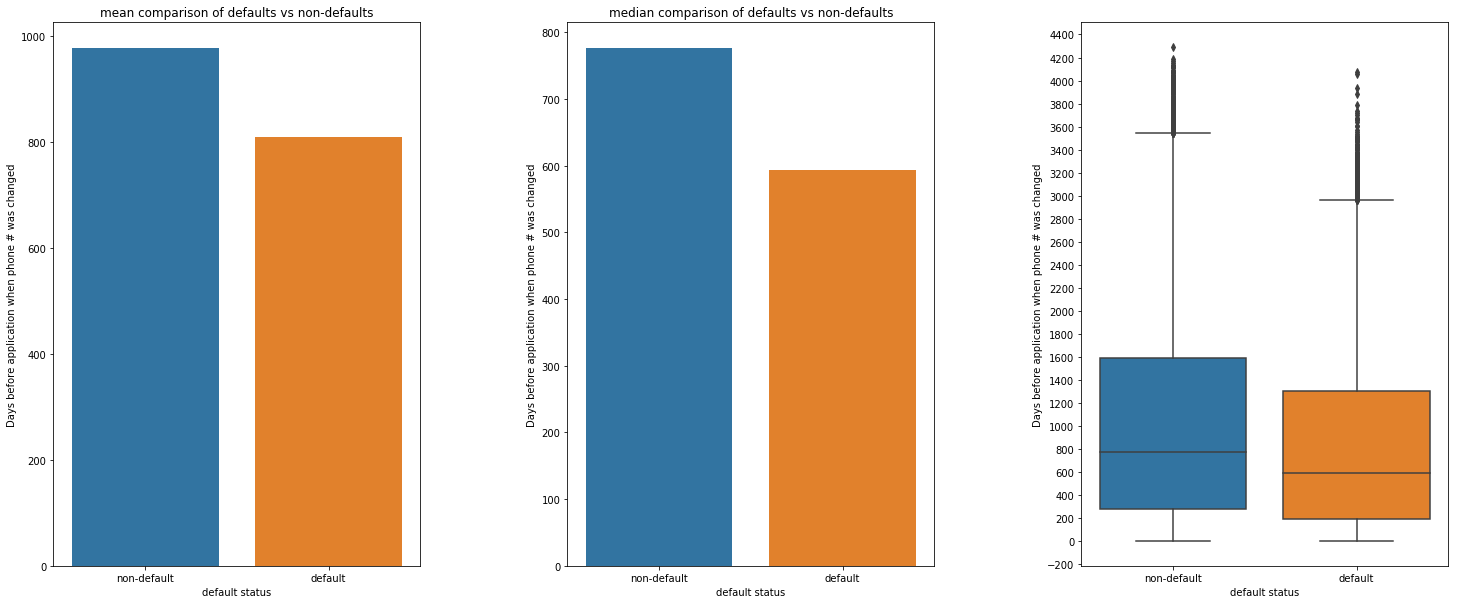

In [60]:
credreport('DAYS_LAST_PHONE_CHANGE','Days before application when phone # was changed',numbin = 35, binflag = 1)

In [61]:
lpc_def = overeda[overeda['default'] == 1]['DAYS_LAST_PHONE_CHANGE']
lpc_nondef = overeda[overeda['default'] == 0]['DAYS_LAST_PHONE_CHANGE']

In [63]:
print('The mean value of days since last phone change for the default group is {:0.3f}'.format(lpc_def.mean()))
print('The mean value of days since last phone change for the non-default group is {:0.3f}'.format(lpc_nondef.mean()))

The mean value of days since last phone change for the default group is 808.797
The mean value of days since last phone change for the non-default group is 976.388


In [64]:
lpc_def.describe()

count    24825.000000
mean       808.796818
std        758.090713
min          0.000000
25%        194.000000
50%        594.000000
75%       1301.000000
max       4070.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [65]:
lpc_nondef.describe()

count    282685.000000
mean        976.388294
std         831.210739
min           0.000000
25%         281.000000
50%         776.000000
75%        1586.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

The mean of days since last phone number change for the non-default group is 976 days whereas the employment duration for the
default group is 808 days. 

There is also substantial diffrence in days since last phone number change of the two groups in their 50th (median) and 75th percentiles respectively.
The 75th percentile of the non-default group is 1586 days whereas for the default group it is 1301 days. Similarly, the
median of the non-default group is 776 days whereas for the default group it is 594 days. The difference in 50th and 75th percentile between the two groups can be cleary visualized in the above box plot.

In conclusion, the findings from the bargraph indicate that on average the days since last phone number change for the people who defaulted 
is earlier than that of the people who didn't default.

The next variable that i am going to pickup for the visual investigation is <b> DAYS_ID_PUBLISH </b> which is nothing but
how many days before the application did client change/update their id card with which they applied for the loan.

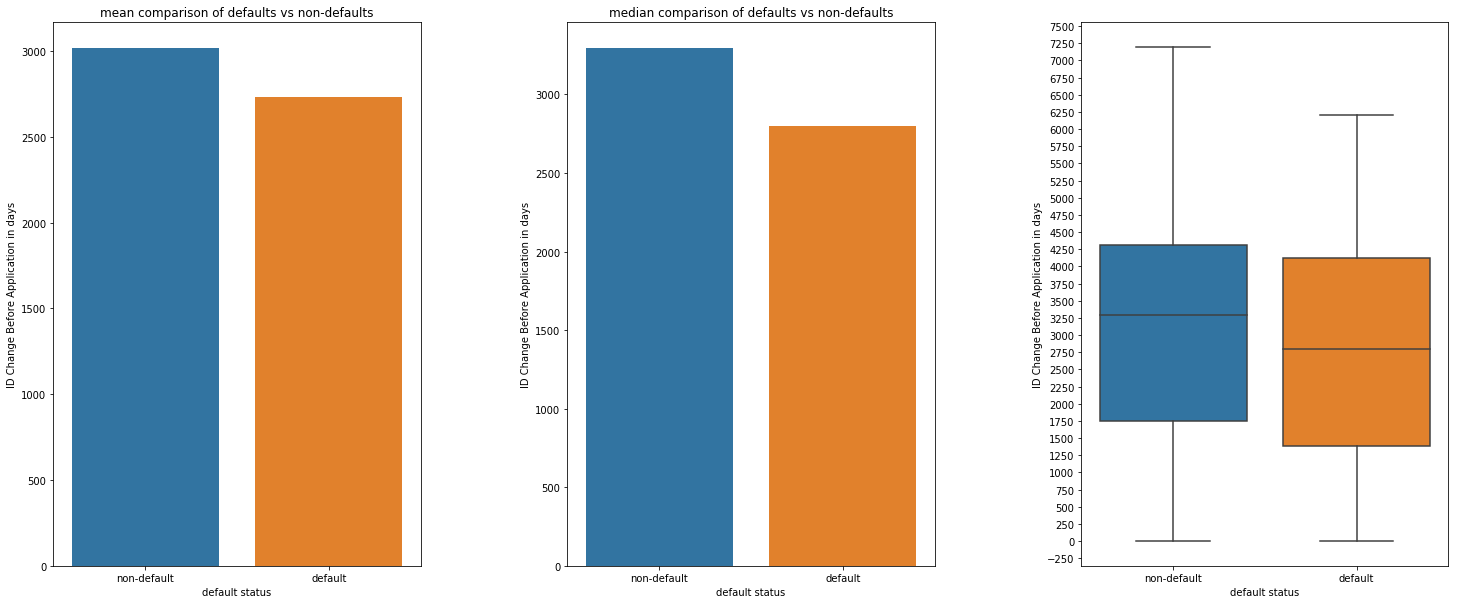

In [23]:
credreport('DAYS_ID_PUBLISH','ID Change Before Application in days',numbin = 35, binflag = 1)

In [67]:
idc_def = overeda[overeda['default'] == 1]['DAYS_ID_PUBLISH']
idc_nondef = overeda[overeda['default'] == 0]['DAYS_ID_PUBLISH']

In [68]:
idc_def.mean()

2732.099617321249

In [69]:
idc_nondef.mean()

3017.2197880333656

In [70]:
idc_def.describe()

count    24825.000000
mean      2732.099617
std       1516.975313
min          0.000000
25%       1392.000000
50%       2797.000000
75%       4119.000000
max       6207.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [71]:
idc_nondef.describe()

count    282686.000000
mean       3017.219788
std        1506.614090
min           0.000000
25%        1755.000000
50%        3295.000000
75%        4313.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

The mean of days before the id change/update (id with which the client applied for the loan)for the non-default group is 3017 days whereas for the
default group the value is 2732 days. 

There is also substantial diffrence in days before the id change/update of the two groups in their 50th (median) and 75th percentiles respectively.
The 75th percentile of the non-default group is 4313 days whereas for the default group it is 4119 days. Similarly, the
median of the non-default group is 3295 days whereas for the default group it is 2797 days. The difference in 50th and 75th percentile between the two groups can be cleary visualized in the above box plot.

In conclusion, the findings from the bargraph indicate that on average the days before the id change/update for the people who defaulted 
is earlier than that of the people who didn't default.

### Overall Conclusion:

<b> The data visualization of total income reveals that income doesn't appear to be a good differentiator
of defaults from non-defaults. But the varibles age, employment duration, days since last phone number change and days before the id change/update shows a pattern that the non-defaults on average appear to be elder in age and more stable in their behavior in changing employment, changing phone numbers and changing/updating ids when compared to defaults. </b>`
    
<b> This relative stability also reflects in their behavior in paying back the loan without defaulting. </b>